# Test Notebook to integrate Hillshades in the Geological Map

This notebook is based on the input data from the Fixture Model Example in the kriging_examples subfolders in the experimental folder

# Importing Libraries

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
# just here as it is subfolder in experimental
os.pardir = '../..'

# Importing GemPy
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
#import numpy as np
#import matplotlib.pyplot as plt

# Initiating the Model

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"


geo_data = gp.create_data([0,2500,0,2500,0,1000],resolution=[200,200,100], 
                        path_o = path_to_data + "fixture_model_orientations.csv",
                        path_i = path_to_data + "fixture_model_surfaces.csv") 

Active grids: ['regular']


# Surface Mapping

In [3]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series": ('fault'), "Strat_Series1": ('rock3'),
                                     "Strat_Series2": ('rock2','rock1'),
                                     "Basement_Series":('basement')})

geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series1,False,False
Strat_Series2,False,False
Basement_Series,False,False


# Color Adaption

In [4]:
geo_data.surfaces.colors.change_colors({'fault': '#000000', 'rock1': '#CC081F', 'rock2': '#FFAA00',
                                        'rock3': '#006C8C', 'basement': '#097703'})

,surface,series,order_surfaces,isActive,color,id
3,fault,Fault_Series,1,True,#000000,1
0,rock3,Strat_Series1,1,True,#006C8C,2
1,rock2,Strat_Series2,1,True,#FFAA00,3
2,rock1,Strat_Series2,2,True,#CC081F,4
4,basement,Basement_Series,1,True,#097703,5


In [5]:
geo_data.surfaces

,surface,series,order_surfaces,isActive,color,id
3,fault,Fault_Series,1,True,#000000,1
0,rock3,Strat_Series1,1,True,#006C8C,2
1,rock2,Strat_Series2,1,True,#FFAA00,3
2,rock1,Strat_Series2,2,True,#CC081F,4
4,basement,Basement_Series,1,True,#097703,5


# Cross Section of Input Data

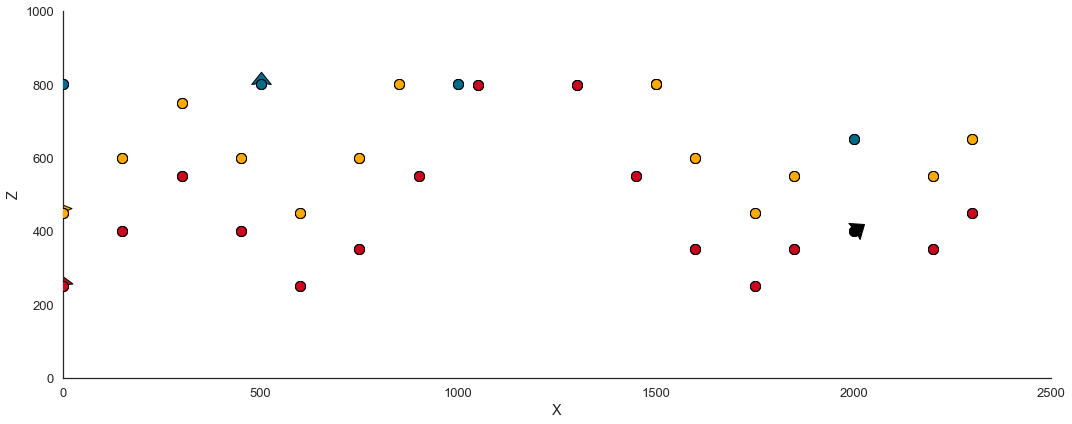

In [6]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

# Setting the Interpolation

In [7]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range                 3674.23
$C_o$                  321429
drift equations  [3, 3, 3, 3]


# Setting a random Topography

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   6.25      ,    6.25      ,    5.        ],
       [   6.25      ,    6.25      ,   15.        ],
       [   6.25      ,    6.25      ,   25.        ],
       ...,
       [2468.75      , 2493.75      ,  460.63765059],
       [2481.25      , 2493.75      ,  463.20208229],
       [2493.75      , 2493.75      ,  461.53796734]])

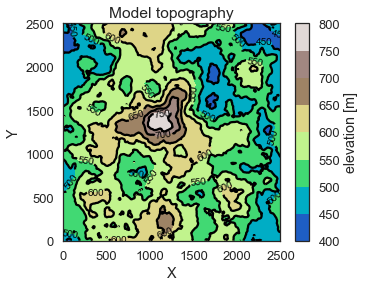

In [8]:
geo_data.set_topography(d_z=np.array([400,800]))

# Computing the Model

In [9]:
sol = gp.compute_model(geo_data)

../../..\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


# Cross Section Plot with Topography

p1 [0.0, 625.0] p2 [2500.0, 625.0]


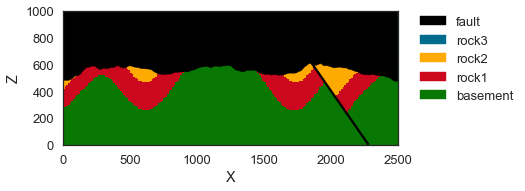

In [10]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=50,
                         direction='y', show_data=True, show_topo =True)

# Plot of Geological Maps

**The following subplots demonstrate the new implemented feature to display hillshades below the geological map. Plot one is the original map as plotted with gempy. The second plot shows the manual integrating of the feature. The third plot shows the integrated feature for the GemPy plotting function.**

**In order to keep this feature optional, the optional argument ```show_hillshades``` was introduced. By default it will be set to ```False```. The hillshades will be activated when the argument ```show_hillshades = True``` is passed to the plotting function as shown below.**

20.307429810731605


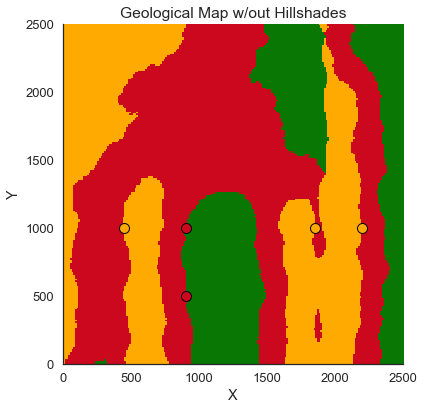

In [11]:
# Default Function of Gempy
gp.plot.plot_map(geo_data, show_data = True, show_hillshades = False)
plt.title('Geological Map w/out Hillshades');

20.307429810731605


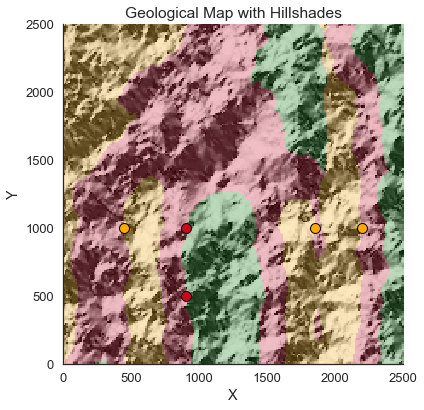

In [12]:
# # Workaround
from matplotlib.colors import LightSource
ls = LightSource(azdeg=225, altdeg=45)
hill_topo1 = ls.hillshade(geo_data.grid.topography.values_3D[:, :, 2])


gp.plot.plot_map(geo_data)
plt.imshow(hill_topo1, origin='lower', extent=geo_data.grid.topography.extent, alpha = 0.75)
plt.gca().set_aspect('equal')
plt.title('Geological Map with Hillshades');

20.307429810731605


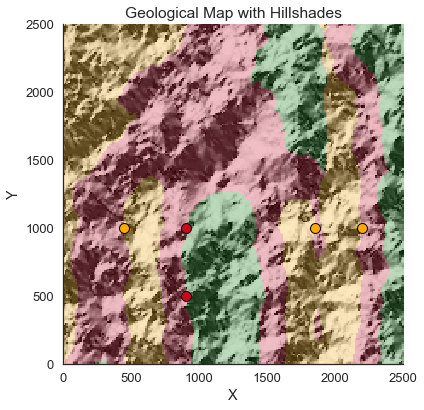

In [14]:
# New implementation
gp.plot.plot_map(geo_data, show_data=True, show_hillshades=True, azdeg=225, altdeg=45)
plt.gca().set_aspect('equal')
plt.title('Geological Map with Hillshades');